In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [69]:
dataset = pd.read_csv('fdeec17.csv')

In [70]:
dataset.head()

,Unnamed: 0,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,...,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,0,2017,1,1,1,2,50,50,2,1,...,30.0,52.0,1,263.388752,37.0,NaN,37.0,NaN,5.0,NaN
1,1,2017,1,1,1,2,15,15,2,2,...,42.0,52.0,1,263.388752,32.0,NaN,32.0,NaN,4.0,NaN
2,2,2017,1,1,1,2,15,15,2,2,...,31.0,52.0,1,263.388752,38.0,NaN,38.0,NaN,5.0,NaN
3,3,2017,3,1,1,2,50,50,2,1,...,30.0,52.0,2,176.893923,37.0,NaN,37.0,NaN,5.0,NaN
4,4,2017,3,1,1,2,15,15,2,2,...,42.0,52.0,2,176.893923,40.0,NaN,32.0,NaN,4.0,NaN


In [71]:
chomeurs = dataset['ACTEU'].apply(lambda x: 
                               "Actif Occupé" if x==1 
                               else "Chômeur" if x == 2
                               else "Inactif" if x==3 
                               else "NAN")

In [72]:
pie_chart_data = chomeurs.value_counts()
pie_chart_data

ACTEU
Inactif         207520
Actif Occupé    198054
Chômeur          21864
NAN               1204
Name: count, dtype: int64

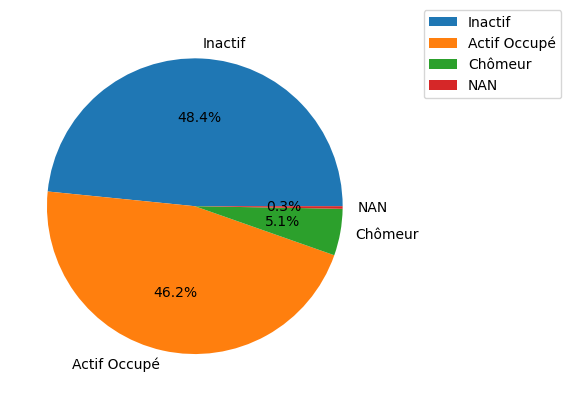

In [73]:
plt.figure()
plt.pie(pie_chart_data.values, labels=pie_chart_data.index, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


In [74]:
chomeurs = dataset['ACTEU6'].apply(lambda x: 
                                
                                "Actif Occupé" if x == 1 
                                else "Chômeur PSERE" if x == 3 
                                else "Autre Chômeur BIT" if x==4 
                                else "Etudiant, élève, stagiaire en formation" if x == 5
                                else "Autres inactifs (dont retraité)" if x == 6
                                else "NAN"
                               
                               )

pie_chart_data = chomeurs.value_counts()

In [75]:
pie_chart_data

ACTEU6
Actif Occupé                               198054
Autres inactifs (dont retraité)            172921
Etudiant, élève, stagiaire en formation     34599
Chômeur PSERE                               20854
NAN                                          1204
Autre Chômeur BIT                            1010
Name: count, dtype: int64

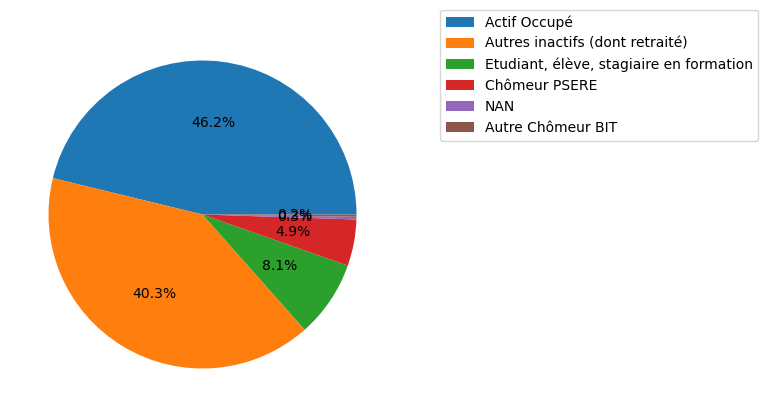

In [76]:
plt.figure(figsize = (10,5))
plt.pie(
    pie_chart_data, 
    autopct = '%1.1f%%')

plt.legend(pie_chart_data.index, bbox_to_anchor=(1.1, 1.05))
plt.show()


In [77]:
# On recréé les données dont on a besoin 
chomeurs = dataset['ACTEU'].apply(lambda x: 
                               "Actif Occupé" if x==1 
                               else "Chômeur" if x == 2
                               else "Inactif" if x==3 
                               else "NAN")

chart_data = chomeurs.value_counts()
chart_data

ACTEU
Inactif         207520
Actif Occupé    198054
Chômeur          21864
NAN               1204
Name: count, dtype: int64

In [78]:
chom_actif = chart_data[2] / chart_data[1]
chom_actif_inactif = chart_data[2] / (chart_data[1] + chart_data[0])

data = [chom_actif, chom_actif_inactif]
print("Rapports de chômeurs\n {}".format(data))

Rapports de chômeurs
 [0.11039413493289708, 0.05390878113488537]


C:\Users\darla\AppData\Local\Temp\ipykernel_14648\2773633379.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chom_actif = chart_data[2] / chart_data[1]
C:\Users\darla\AppData\Local\Temp\ipykernel_14648\2773633379.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chom_actif_inactif = chart_data[2] / (chart_data[1] + chart_data[0])


In [79]:
data_actifs = np.array([1,1]) - data
print("Rapports d'actifs\n {}".format(data_actifs))

Rapports d'actifs
 [0.88960587 0.94609122]


In [80]:
legend = ["Chômeurs / Actifs Occupés", "Chômeurs / Actifs + Inactifs"]
legend

['Chômeurs / Actifs Occupés', 'Chômeurs / Actifs + Inactifs']

In [81]:
plt.text

<function matplotlib.pyplot.text(x: 'float', y: 'float', s: 'str', fontdict: 'dict[str, Any] | None' = None, **kwargs) -> 'Text'>

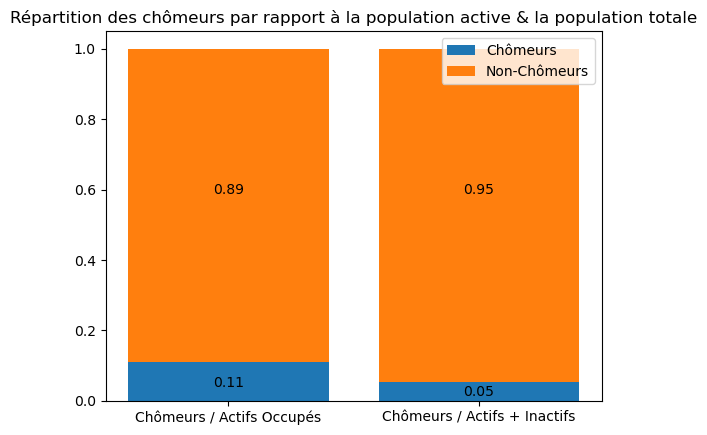

In [82]:
# Create two bar charts who will be surperposed
## Don't forget to use two ax.bar()
## To create legends, we can use ax1.text()
## To create a title, we can yse ax1.set_title()

plt.figure()

plt.bar(legend, 
         data,
        label="Chômeurs")

plt.bar(legend,
        data_actifs, 
        bottom=data,
        label="Non-Chômeurs")

plt.text(legend[0], 0.6, np.round(data_actifs[0],2), ha = "center", va = "center")
plt.text(legend[0], 0.05, np.round(data[0],2), ha = "center", va = "center")

plt.text(legend[1], 0.6, np.round(data_actifs[1],2), ha = "center", va = "center")
plt.text(legend[1], 0.025, np.round(data[1],2), ha = "center", va = "center")

plt.legend()
plt.title("Répartition des chômeurs par rapport à la population active & la population totale")

plt.show()


In [83]:
duree_chomage = dataset['ANCCHOM'].apply(lambda x: 
                                       "Moins d'un mois" if x==1 
                                       else "De 1 mois à moins de 3 mois" if x == 2
                                       else "De 3 mois à moins de 6 mois" if x == 3
                                       else "De 3 mois à moins de 6 mois" if x == 3
                                       else "De 6 mois à moins d'un an" if x == 4
                                       else "De 1 an à moins d'un an et demi" if x == 5
                                       else "De 1 an et demi à moins de 2 ans" if x == 6
                                       else "De 2 ans à moins de 3 ans" if x == 7
                                       else "3 ans ou plus" if x == 8
                                       else "NAN")

chart_data = duree_chomage.value_counts()
chart_data

ANCCHOM
NAN                                 406904
3 ans ou plus                         3906
De 6 mois à moins d'un an             3648
De 1 an à moins d'un an et demi       3398
De 1 mois à moins de 3 mois           3270
De 3 mois à moins de 6 mois           3193
De 2 ans à moins de 3 ans             2289
De 1 an et demi à moins de 2 ans      1132
Moins d'un mois                        902
Name: count, dtype: int64

<BarContainer object of 8 artists>

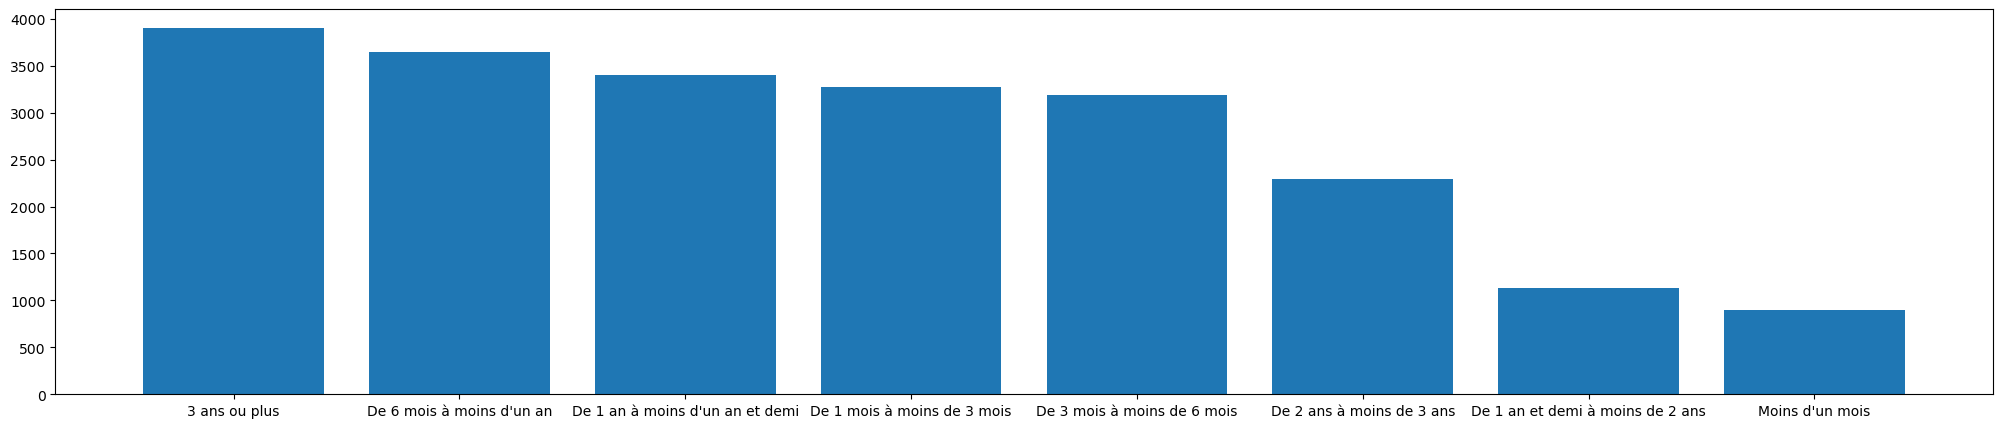

In [84]:
plt.figure(figsize=(25,5))
plt.bar(chart_data.index[1:], chart_data.values[1:])

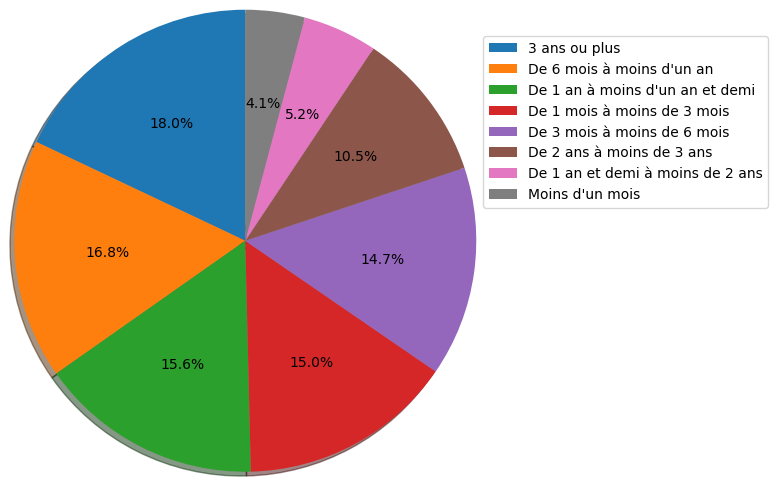

In [85]:
plt.figure(figsize=(10,5))
plt.pie(chart_data[1:], 
       autopct='%1.1f%%',
       shadow=True, 
       startangle=90,
       radius=1.5
       )
plt.legend(chart_data.index[1:], bbox_to_anchor=(1.1, 1.05))
plt.show()


In [86]:
contact = dataset['CONTACT'].apply(lambda x: 
                                       "Oui" if x == 1 
                                       else "Non" if x == 2
                                       else "NAN")

chart_data = contact.value_counts()
chart_data

CONTACT
NAN    399514
Non     15984
Oui     13144
Name: count, dtype: int64

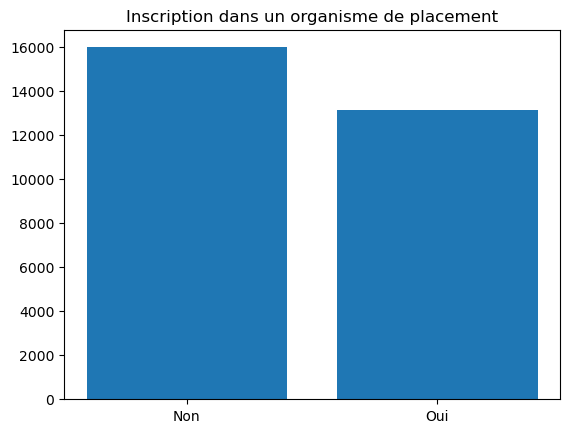

In [87]:
plt.bar(chart_data[1:].index, chart_data[1:].values)
plt.title("Inscription dans un organisme de placement")
plt.show()

In [88]:
creaccp = dataset['CREACCP'].apply(lambda x: 
                                
                                "Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)" if x == 1 
                                else "Désire un emploi plus intéressant" if x == 2
                                else "Veut un emploi plus stable (CDI)" if x == 3
                                else "Veut travailler plus d'heures" if x == 4
                                else "Désire un travail avec un rythme horaire plus adapté ou plus modulable" if x == 5
                                else "Désire des conditions de travail moins pénibles ou plus adaptées à sa santé" if x == 6
                                else "Désire augmenter ses revenus" if x == 7
                                else "Désire diminuer son temps de transport" if x == 8
                                else "Doit ou veut déménager" if x == 9
                                else "Veut s'installer à son compte" if x == 10
                                else "Veut changer de métier ou de secteur" if x == 11
                                else "Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles" if x == 12
                                else "NAN")

chart_data = creaccp.value_counts(ascending=True)
chart_data

CREACCP
Doit ou veut déménager                                                                   216
Veut s'installer à son compte                                                            354
Désire diminuer son temps de transport                                                   598
Désire un travail avec un rythme horaire plus adapté ou plus modulable                  1102
Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles          1223
Veut changer de métier ou de secteur                                                    1392
Veut travailler plus d'heures                                                           1404
Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)      1582
Désire des conditions de travail moins pénibles ou plus adaptées à sa santé             1820
Veut un emploi plus stable (CDI)                                                        2462
Désire un emploi plus intéressant                             

In [89]:
s = np.sum(chart_data.values[:-1])
print(s)

21707


In [90]:
repartition = [np.round(element/s*100,2) for element in chart_data.values[:-1]]
repartition

[1.0, 1.63, 2.75, 5.08, 5.63, 6.41, 6.47, 7.29, 8.38, 11.34, 12.8, 31.21]

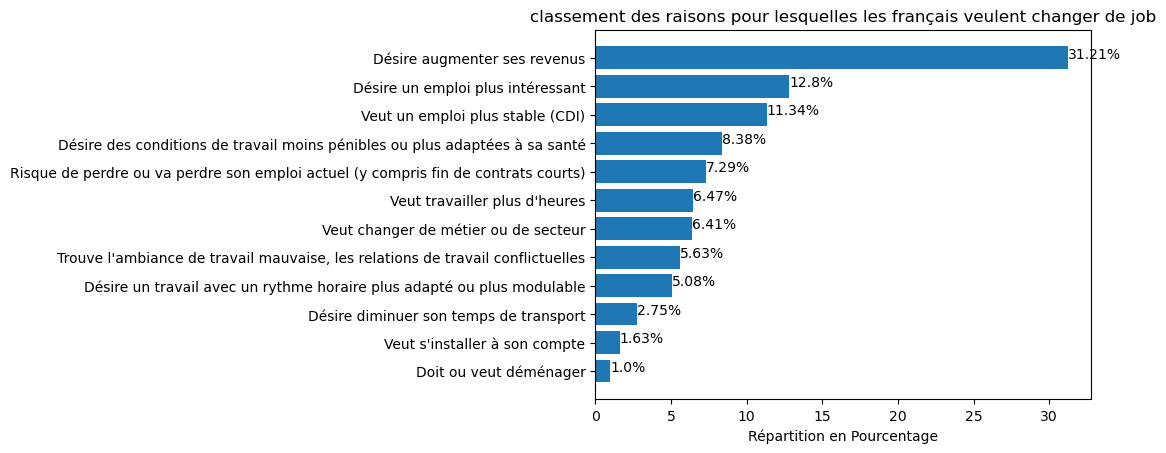

In [91]:
plt.title("classement des raisons pour lesquelles les français veulent changer de job")
plt.barh(chart_data.index[:-1], repartition)
plt.xlabel("Répartition en Pourcentage")


for i in range(len(repartition)):
    plt.text(repartition[i], chart_data.index[:-1][i],'{}%'.format(repartition[i]))
    
plt.show()

In [92]:
num_bins=len(dataset['HREC'].value_counts())

In [93]:
plt.hist

<function matplotlib.pyplot.hist(x: 'ArrayLike | Sequence[ArrayLike]', bins: 'int | Sequence[float] | str | None' = None, range: 'tuple[float, float] | None' = None, density: 'bool' = False, weights: 'ArrayLike | None' = None, cumulative: 'bool | float' = False, bottom: 'ArrayLike | float | None' = None, histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar', align: "Literal['left', 'mid', 'right']" = 'mid', orientation: "Literal['vertical', 'horizontal']" = 'vertical', rwidth: 'float | None' = None, log: 'bool' = False, color: 'ColorType | Sequence[ColorType] | None' = None, label: 'str | Sequence[str] | None' = None, stacked: 'bool' = False, *, data=None, **kwargs) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'>

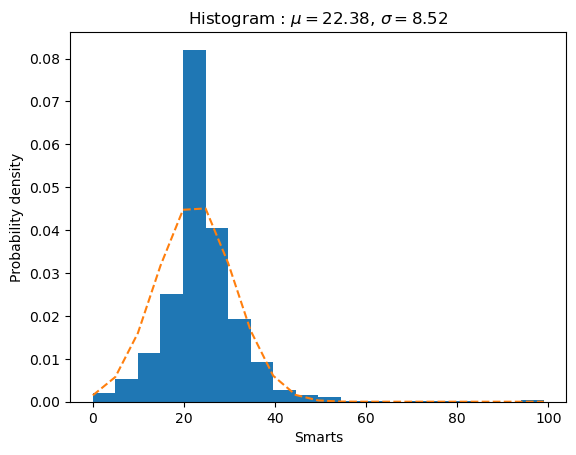

In [94]:
mu = dataset['HREC'].mean()  # mean of distribution
sigma = dataset['HREC'].std()  # standard deviation of distribution

plt.figure()

# the histogram of the data
n, bins, patches = plt.hist(dataset['HREC'], 20, density=True)

# Formule pour la densité
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

plt.plot(bins, y, '--')
plt.xlabel('Smarts')
plt.ylabel('Probability density')
plt.title(r'Histogram : $\mu={}$, $\sigma={}$'.format(np.round(mu,2), np.round(sigma,2)))
plt.show()